In [ ]:
import numpy as np
 
from sklearn import datasets, linear_model
 
import matplotlib.pyplot as plt

In [ ]:
with open("./train_features.npy","rb") as f:
    train_x = np.load(f, allow_pickle=True)

with open("./train_labels.npy","rb") as f:
    train_y = np.load(f, allow_pickle=True)

with open("./test_features.npy","rb") as f:
    test_x = np.load(f, allow_pickle=True)

with open("./test_labels.npy","rb") as f:
    test_y = np.load(f, allow_pickle=True)


In [ ]:
regr = linear_model.LinearRegression(fit_intercept=True) # fit_intercept = False for calculating the bias
a=regr.fit(train_x, train_y)
 
predict = a.predict(
    test_x
)
loss = np.mean(np.abs(predict - test_y))
loss,a.score(
    test_x, test_y
)

(10.27816979321315, 0.7787758165932517)

In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((50000, 8), (50000, 1), (50000, 8), (50000, 1))

In [ ]:
a.coef_, a.intercept_

(array([[ 2.00507504e+00, -3.47821684e+00,  5.80827091e+00,
          4.50345734e+00, -8.70777750e-05,  1.14458930e+01,
          1.26322379e+01,  1.36236443e+01]]), array([-2.95950022]))

<BarContainer object of 8 artists>

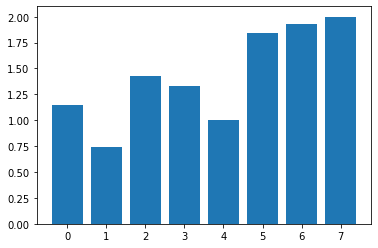

In [ ]:
show_matrix = a.coef_
show_matrix = (show_matrix) / np.max(show_matrix)  + 1

plt.bar([i for i in range(8)], show_matrix.reshape(-1))

In [ ]:
new_z = train_x[...,4] * train_x[...,1]
new_z = new_z.reshape(-1,1)

<BarContainer object of 9 artists>

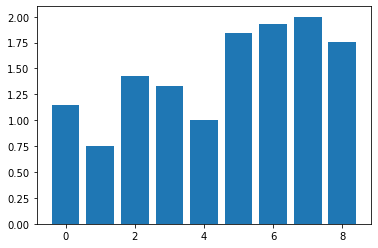

In [ ]:
new_train_x = np.concatenate((train_x, new_z), axis=1)
regr = linear_model.LinearRegression(fit_intercept=True) # fit_intercept = False for calculating the bias
a=regr.fit(new_train_x, train_y)
show_matrix = a.coef_
show_matrix = (show_matrix) / np.max(show_matrix)  + 1

plt.bar([i for i in range(9)], show_matrix.reshape(-1))

In [ ]:
new_z = test_x[...,4] * test_x[...,1]
new_test_x = np.concatenate((test_x, new_z.reshape(-1,1)), axis=1)
predict = a.predict(
    new_test_x
)
loss = np.mean(np.abs(predict - test_y))
loss

5.971110198852915

In [ ]:
a.score(
    new_test_x, test_y
)

0.9180999459966547

In [ ]:
np.random.seed(1)
def ml_auto(X):
  
  num_feature = X.shape[1]
  new_f = []
  for i in range(num_feature):
    # print(i,num_feature)
    # v = int(np.random.normal() * 4)
    z= np.sign(X[...,i]) * np.abs(X[...,i]) ** 3
    z=z.reshape(-1,1)
    new_f.append(
       z
    )
  
  Xx = np.concatenate([X,] + new_f, axis=1)
  return Xx
  

In [ ]:
new_train_x = ml_auto(new_train_x)
new_test_x = ml_auto(new_test_x)

<BarContainer object of 18 artists>

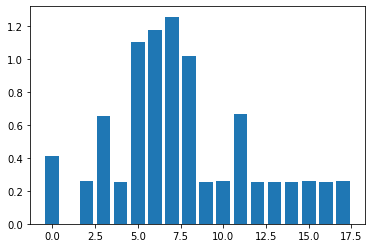

In [ ]:

regr = linear_model.LinearRegression(fit_intercept=True) # fit_intercept = False for calculating the bias
a=regr.fit(new_train_x, train_y)
show_matrix = a.coef_
show_matrix = (show_matrix) / np.max(show_matrix)  

show_matrix  = show_matrix - np.min(show_matrix)
plt.bar([i for i in range(show_matrix.shape[1])], show_matrix.reshape(-1))

In [ ]:

predict = a.predict(
    new_test_x
)
loss = np.mean(np.abs(predict - test_y))
loss

5.273360774240515

In [ ]:
a.score(
    new_test_x, test_y
),show_matrix

(0.9333172678838625,
 array([[0.41169312, 0.        , 0.25702712, 0.65411305, 0.25628471,
         1.10376149, 1.17758616, 1.25627703, 1.01615731, 0.25363605,
         0.25811083, 0.66381294, 0.256035  , 0.25627703, 0.25475157,
         0.25753176, 0.25648361, 0.25680632]]))

<BarContainer object of 16 artists>

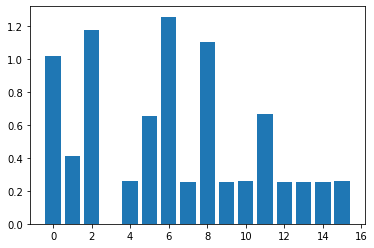

In [ ]:
keep_dim =np.argsort(show_matrix.reshape(-1))[-17:]
new_train_x1 =new_train_x[...,keep_dim]
new_test_x1 = new_test_x[..., keep_dim]

regr = linear_model.LinearRegression(fit_intercept=True) # fit_intercept = False for calculating the bias
a=regr.fit(new_train_x1, train_y)
show_matrix = a.coef_
show_matrix = (show_matrix) / np.max(show_matrix)  

show_matrix  = show_matrix - np.min(show_matrix)
plt.bar([i for i in range(show_matrix.shape[1])], show_matrix.reshape(-1))

In [ ]:

predict = a.predict(
    new_test_x1
)
loss = np.mean(np.abs(predict - test_y))
loss

5.273057500497267

<BarContainer object of 16 artists>

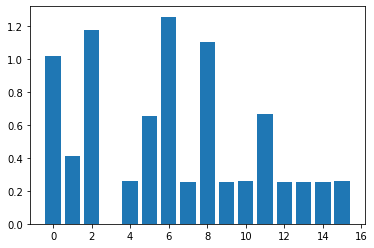

In [ ]:
keep_dim =np.argsort(show_matrix.reshape(-1))[-16:]
new_train_x2 =new_train_x1[...,keep_dim]
new_test_x2 = new_test_x1[..., keep_dim]

regr = linear_model.LinearRegression(fit_intercept=True) # fit_intercept = False for calculating the bias
a=regr.fit(new_train_x2, train_y)
show_matrix = a.coef_
show_matrix = (show_matrix) / np.max(show_matrix)  

show_matrix  = show_matrix - np.min(show_matrix)
plt.bar([i for i in range(show_matrix.shape[1])], show_matrix.reshape(-1))

In [ ]:

predict = a.predict(
    new_test_x2
)
loss = np.mean(np.abs(predict - test_y))
loss

5.273057500497267

<BarContainer object of 15 artists>

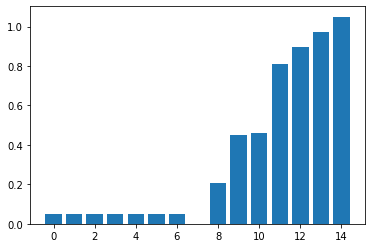

In [ ]:
keep_dim =np.argsort(show_matrix.reshape(-1))[-15:]
new_train_x3 =new_train_x2[...,keep_dim]
new_test_x3 = new_test_x2[..., keep_dim]

regr = linear_model.LinearRegression(fit_intercept=True) # fit_intercept = False for calculating the bias
a=regr.fit(new_train_x3, train_y)
show_matrix = a.coef_
show_matrix = (show_matrix) / np.max(show_matrix)  

show_matrix  = show_matrix - np.min(show_matrix)
plt.bar([i for i in range(show_matrix.shape[1])], show_matrix.reshape(-1))

In [ ]:

predict = a.predict(
    new_test_x3
)
loss = np.mean(np.abs(predict - test_y))
loss

5.481966558313683